In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv(r"M:\ML_Practice\Statistics Distribution\Algerian_forest_fires.csv")

In [3]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


In [4]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire


In [5]:
dataset.columns


Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

##### From here we can notice that After the Classes column name, there is a space. For this space we cannot use this name as "Classes". We must have to use this space also. So, our target is to remove this space.

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4    RH          244 non-null    int64  
 5    Ws          244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(3)
memory usage: 26.8+ KB


### Data Cleaning

In [7]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        1
dtype: int64

In [8]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
165,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [9]:
dataset.loc[:122, "Region"]=0
dataset.loc[122:, "Region"]=1

In [10]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
dataset.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1.0
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1.0
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1.0
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1.0
243,30,9,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,1.0


In [12]:
dataset.columns = dataset.columns.str.strip()


In [13]:
dataset['Classes'].fillna('No Fire', inplace=True)


In [14]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region


In [15]:
df = dataset

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(6), int64(6), object(3)
memory usage: 28.7+ KB


#### Convert this Region data value from float to int value

In [17]:
df[['Region']]= df[["Region"]].astype(int)

In [18]:
# Reset the index
df.reset_index()

,index,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
240,240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [19]:
# Check the null values
df.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

#### From here we can see that there is no Null values

In [20]:
# We can check that our data is divided in two regions, one is 0 and other is 1
df.loc[120:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire,0
121,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire,0
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1
123,2,6,2012,30,73,13,4.0,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1
124,3,6,2012,29,80,14,2.0,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    object 
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(5), int32(1), int64(6), object(3)
memory usage: 27.8+ KB


In [22]:
objects = [features for features in df.columns if df[features].dtype == 'O']


In [23]:
objects

['DC', 'FWI', 'Classes']

In [24]:
for i in objects:
    if i != 'Classes':
        try:
            df[i] = df[i].astype(float)
        except ValueError:
            print(f"Cannot convert column {i} to float.")


Cannot convert column DC to float.
Cannot convert column FWI to float.


In [25]:
def check_conversion(column):
    problematic_values = []
    for value in df[column]:
        try:
            float(value)
        except ValueError:
            problematic_values.append(value)
    return problematic_values

for i in objects:
    if i != 'Classes':
        issues = check_conversion(i)
        if issues:
            print(f"Cannot convert column {i} to float. Problematic values: {issues}")
        else:
            df[i] = df[i].astype(float)


Cannot convert column DC to float. Problematic values: ['14.6 9']
Cannot convert column FWI to float. Problematic values: ['fire   ']


In [26]:
# Convert these values
# Replace '14.6 9' with a single value, e.g., using the first part '14.6'
df['DC'] = df['DC'].replace('14.6 9', '14.6')

# Replace 'fire   ' with a numeric value, e.g., '0' or NaN
df['FWI'] = df['FWI'].replace('fire   ', '0.1')

# Convert the columns to float after cleaning
df['DC'] = df['DC'].astype(float)
df['FWI'] = df['FWI'].astype(float)


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           244 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    float64
 13  Classes      244 non-null    object 
 14  Region       244 non-null    int32  
dtypes: float64(7), int32(1), int64(6), object(1)
memory usage: 27.8+ KB


In [28]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.774180,16.664754,7.006967,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.175318,14.204824,7.438505,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


#### So, these are data cleaning

In [29]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


### EDA and feature Engineering

In [30]:
#copy this clean data as a csv file:
df.to_csv(r"M:\ML_Practice\Statistics Distribution\Algerian_forest_cleaned.csv")

In [31]:
df_copy = pd.read_csv(r"M:\ML_Practice\Statistics Distribution\Algerian_forest_cleaned.csv")

In [32]:
df_copy.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [33]:
# remove the unwanted columns:
df_copy=df.drop(['day','month','year'], axis=1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
No Fire            1
not fire           1
Name: count, dtype: int64

##### From the above codes we can see that "Fire" "Not Fire" has different classes, so, we have to solve this problem.

In [36]:
df_copy['Classes']=np.where(df['Classes']=='not fire',0,1)

In [37]:
df_copy['Classes'].value_counts()

Classes
1    242
0      2
Name: count, dtype: int64

##### By using this code we will not able to solve this problem, we can use another  code to solve this

In [38]:
df_copy['Classes']=np.where(df['Classes'].str.contains('not fire'),0,1)

In [39]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [40]:
df_copy['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

#### Visualization

C:\Users\moham\AppData\Local\Temp\ipykernel_25804\2695625542.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


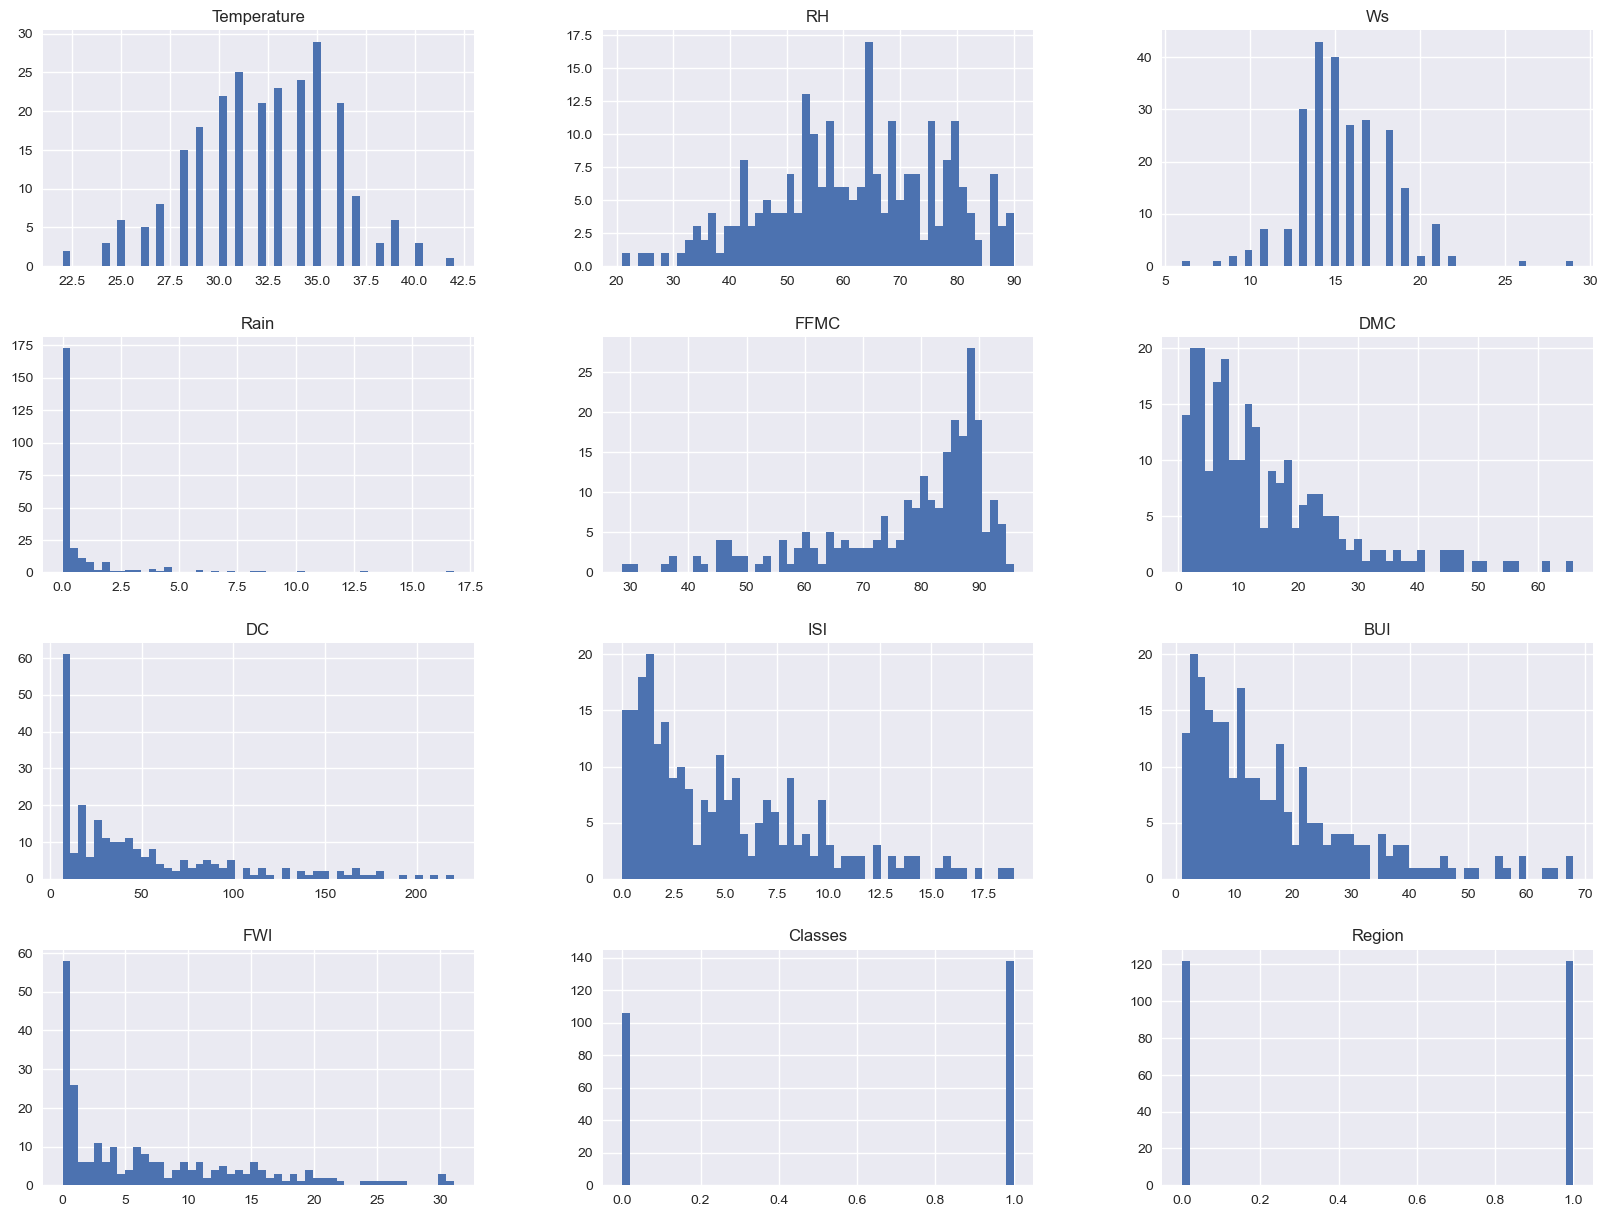

In [41]:
# Plot density plot for all features
plt.style.use('seaborn')
df_copy.hist(bins=50,figsize=(20,15))
plt.show()

In [42]:
# Percentage for pie chart
percentage=df_copy['Classes'].value_counts(normalize=True)*100

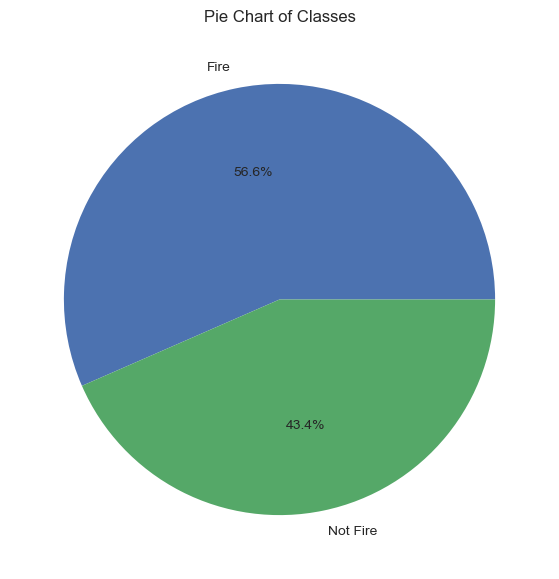

In [43]:
# Ploting pie chart
classlables = ['Fire', 'Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage, labels=classlables, autopct='%1.1f%%')
plt.title('Pie Chart of Classes')
plt.show()

In [44]:
# Find the coorelation between features
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.607551,0.455504,0.558495,0.518119,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.690637,-0.348587,-0.570119,-0.435023,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.015248,0.029756,0.028850,-0.066529,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347105,-0.299171,-0.322715,-0.379449,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.739730,0.589652,0.686111,0.770114,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.674499,0.982073,0.874816,0.584188,0.191094
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.498909,0.941904,0.740187,0.507122,-0.081489
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.498909,1.000000,0.635891,0.907610,0.735511,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941904,0.635891,1.000000,0.857791,0.583882,0.087370
FWI,0.558495,-0.570119,0.028850,-0.322715,0.686111,0.874816,0.740187,0.907610,0.857791,1.000000,0.713442,0.192517


##### All the diagonals are 1, any corresponding 2 features if that is negative, it means that both are inversely proportional

<Axes: >

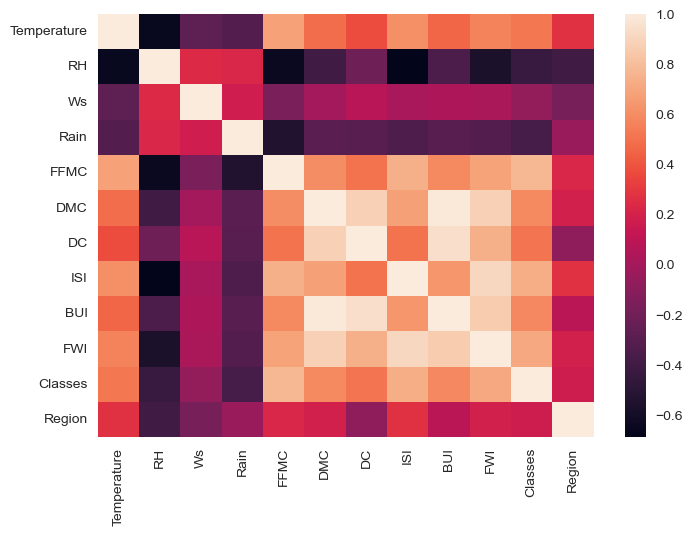

In [45]:
# Heatmap
sns.heatmap(df_copy.corr())

#### From the above map we can see that FWI and BUI are highly correlated. FWI is our dependant feature, so, we have to select other depandant features, which are very correlated.

<Axes: >

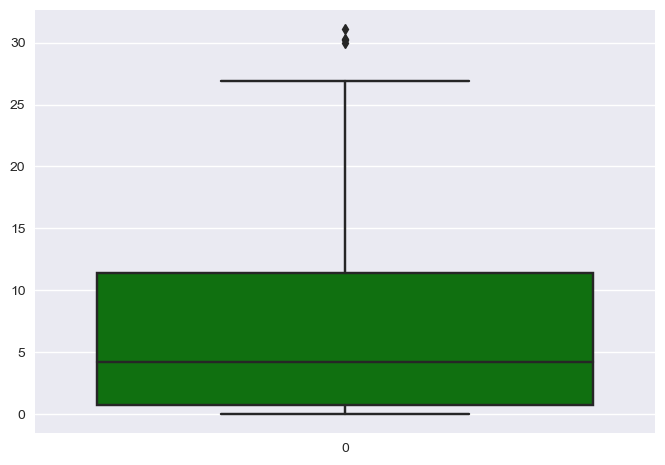

In [46]:
# Box plots
sns.boxplot(df_copy['FWI'], color='green')

In [47]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


#### Monthly data analysis

<Axes: xlabel='month', ylabel='count'>

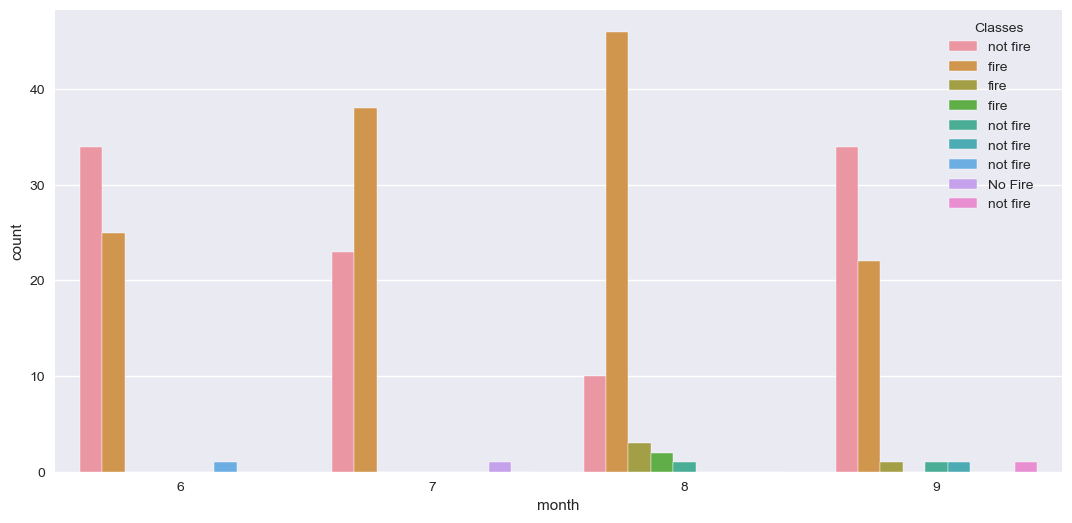

In [48]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)

### Actually we need to see it more clearly by month, in which month the fire is more


In [49]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'Not fire','Fire')

In [50]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,Not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,Not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,Not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,Not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,Not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,Fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,Not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,Not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,Not fire,1


In [51]:
df['Classes'].value_counts()

Classes
Fire        138
Not fire    106
Name: count, dtype: int64

Text(0.5, 1.0, 'Fire analysis of Sidi-Bel Region')

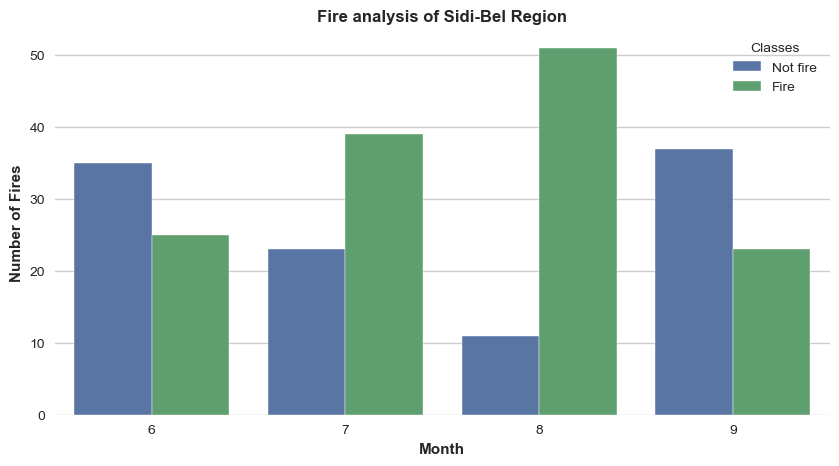

In [52]:
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Month', weight='bold')
plt.title('Fire analysis of Sidi-Bel Region', weight='bold')

Text(0.5, 1.0, 'Fire analysis of Bejaia Region')

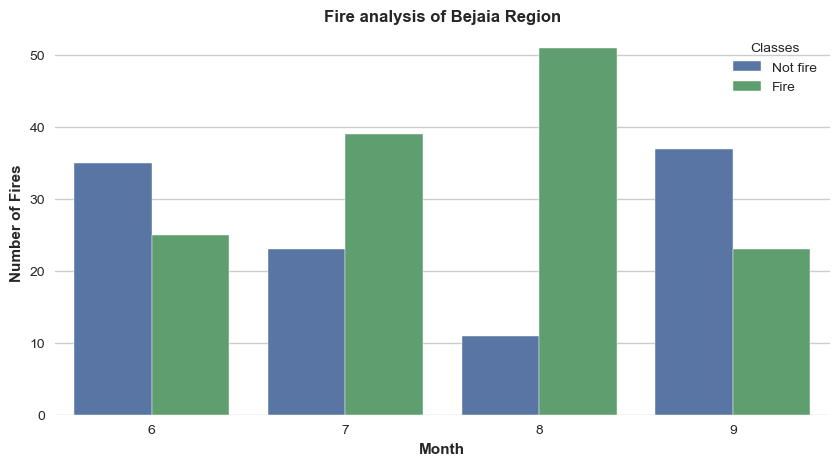

In [53]:
dftemp = df.loc[df['Region']==0]
plt.subplots(figsize=(10,5))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df)
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Month', weight='bold')
plt.title('Fire analysis of Bejaia Region', weight='bold')

##### It's observed that August and September had the most number of largest fires for both regions. And from the above plot of months, we can understand few things.

##### Most of the fires happened in August and very high fires happened in only 3 months, June, July and August

###### less fire was on September

# Model Training Part 

In [54]:
df_mdl= pd.read_csv("M:\ML_Practice\Statistics Distribution\Algerian_forest_cleaned.csv")

In [56]:
df_mdl.head()

,Unnamed: 0,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [57]:
df_mdl = df_mdl.loc[:, ~df_mdl.columns.str.contains('^Unnamed')]


In [58]:
df_mdl.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [59]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [60]:
# Drop the Day, month and year
df_mdl.drop(['day','month','year'], axis=1, inplace=True)

C:\Users\moham\AppData\Local\Temp\ipykernel_25804\1939915219.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mdl.drop(['day','month','year'], axis=1, inplace=True)


In [61]:
df_mdl.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [62]:
df_mdl['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
No Fire            1
not fire           1
Name: count, dtype: int64

In [68]:
df_mdl['Classes']=np.where(df['Classes'].str.contains('fire'),0,1)

C:\Users\moham\AppData\Local\Temp\ipykernel_25804\3926277529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mdl['Classes']=np.where(df['Classes'].str.contains('fire'),0,1)


In [69]:
df_mdl['Classes'].value_counts()

Classes
1    138
0    106
Name: count, dtype: int64

In [70]:
df_mdl.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


### Dividing Independant and Independant features


In [71]:
x=df_mdl.drop('FWI', axis=1)
y=df_mdl['FWI']

In [72]:
x

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0
...,...,...,...,...,...,...,...,...,...,...,...
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0,1


In [73]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

### Train Test Split

In [76]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.25, random_state=42)

In [78]:
x_train.shape, x_test.shape

((183, 11), (61, 11))

In [79]:
# Feature selection based on Correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.374673,0.609525,0.458575,0.512818,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.215075,-0.694976,-0.344365,-0.429397,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.073923,0.015384,0.022529,-0.078171,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.296114,-0.353219,-0.301347,-0.394262,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.508348,0.744270,0.592841,0.774398,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877045,0.652894,0.981876,0.580530,0.197489
DC,0.374673,-0.215075,0.073923,-0.296114,0.508348,0.877045,1.000000,0.496563,0.941248,0.501279,-0.079217
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.496563,1.000000,0.624038,0.744568,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941248,0.624038,1.000000,0.583094,0.092548
Classes,0.512818,-0.429397,-0.078171,-0.394262,0.774398,0.580530,0.501279,0.744568,0.583094,1.000000,0.158763


<Axes: >

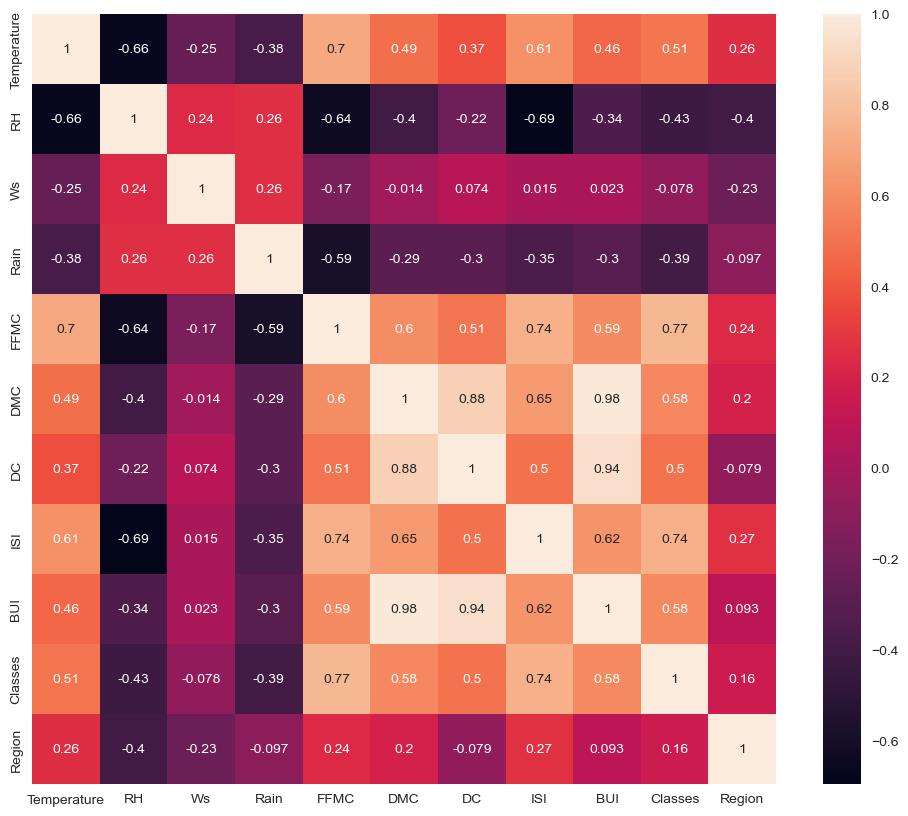

In [80]:
# Lets check for multi correlianirity
plt.figure(figsize=(12,10))
corr = x_train.corr()
sns.heatmap(corr,annot=True)

In [86]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [89]:
## Threshold value coming from expertise, we can test our dataset by using various threshold value
corr_feature = correlation(x_train,0.85)

In [92]:
## drop the features where correlation is greatee than the threshold value.
x_train.drop(corr_feature, axis=1, inplace=True)
x_test.drop(corr_feature, axis=1,inplace=True)

In [93]:
x_train.shape, x_test.shape

((183, 9), (61, 9))

# Feature Scalling or Standarization

In [95]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [96]:
x_train_scaled

array([[-0.81085018,  0.16311382,  1.29231566, ..., -0.773495  ,
        -1.1098231 , -1.00547949],
       [ 1.06405791, -0.44884168,  0.15167049, ...,  0.83939993,
         0.9010445 ,  0.99455037],
       [-0.27516216,  0.63907922, -0.60875963, ..., -0.21981465,
         0.9010445 ,  0.99455037],
       ...,
       [-1.88222624,  0.91105944,  0.53188555, ..., -1.08644476,
        -1.1098231 , -1.00547949],
       [ 0.26052587, -0.38084663,  0.15167049, ...,  0.47830405,
         0.9010445 ,  0.99455037],
       [-0.54300617,  0.9790545 ,  2.05274578, ..., -0.86978723,
        -1.1098231 , -1.00547949]])

# Box Plots to understand Effect of Standard Scaler

C:\Users\moham\AppData\Local\Temp\ipykernel_25804\1005787055.py:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'x_train After Scaling')

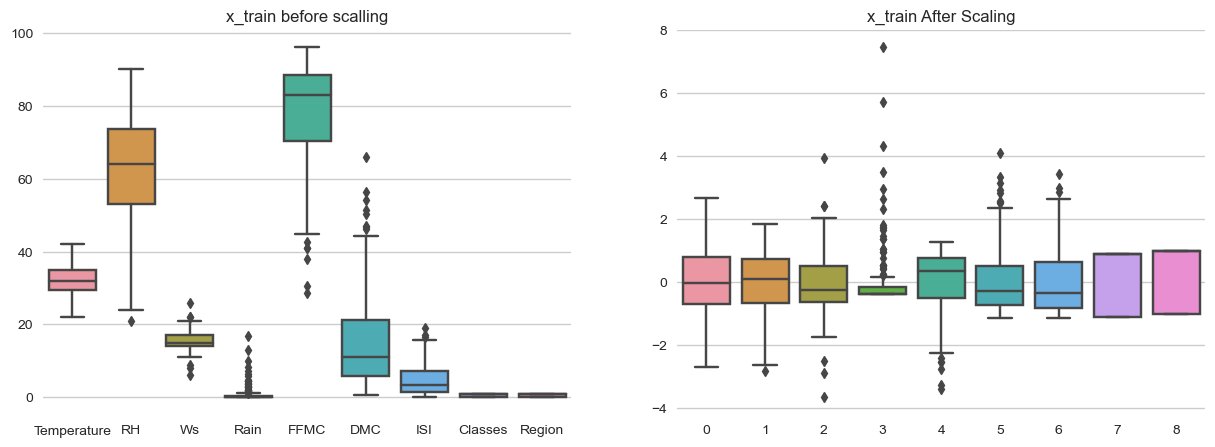

In [97]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=x_train)
plt.title('x_train before scalling')
plt.subplot(1,2,2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train After Scaling')

# linear Regression Model

Mean Absolute Error: 0.6656245822508906
R^2 Score: 0.986945521063433


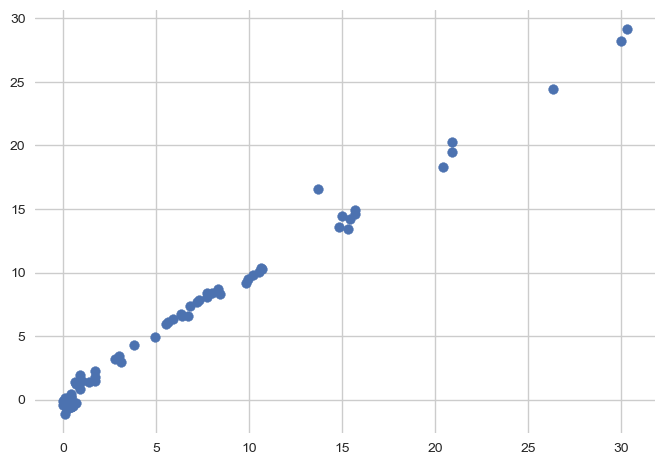

In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)
y_pred = linreg.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)
plt.scatter(y_test, y_pred)

# Lasso Regression

Mean Absolute Error: 1.2599529403915806
R^2 Score: 0.946823258561964


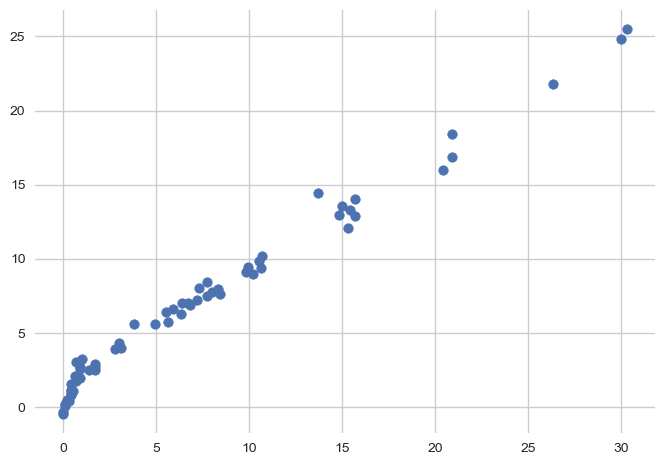

In [105]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score

lesso = Lasso()
lesso.fit(x_train_scaled, y_train)
y_pred =lesso.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)
plt.scatter(y_test, y_pred)

## Cross Validation

In [109]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train_scaled,y_train)

LassoCV(cv=5)

In [111]:
lassocv.predict(x_test_scaled)

array([ 8.23325074,  7.61468933,  6.64814865,  6.35444434, 13.57961937,
        1.4363023 , 10.30828864, -1.23668799,  1.99217375, -0.43323709,
        0.64310974,  4.44294704,  1.878614  ,  1.60510037, 18.19431265,
        6.66921069, 24.29781693, -0.46974684,  7.34898558,  4.94117645,
        1.70666687,  0.17965662,  7.97963089,  0.13447902, 20.16641811,
       -0.12826977,  6.02093727,  9.79413154,  3.52733042, 14.45071062,
        8.56336012, -0.55938231, 10.34365214, 14.54934266,  1.50389947,
        1.60417428,  0.9834184 ,  5.94593534, -0.51154659, -0.62481584,
        6.61885081,  3.01720734,  3.27407372, -0.70187906, 14.90135697,
        8.40013351,  8.46852162,  1.4078633 ,  9.99295412,  9.12927527,
       28.90616152,  2.22150802,  7.9835231 , 19.3595937 , 13.44121429,
       16.50968593, 28.04132824, -0.09623097, -0.47753136, 14.1087231 ,
        9.56496453])

## Alfa value

In [112]:
lassocv.alpha_

0.030493939616048543

In [113]:
lassocv.alphas_

array([6.56972013, 6.12694299, 5.71400753, 5.32890255, 4.96975235,
       4.63480768, 4.32243715, 4.03111936, 3.7594354 , 3.50606204,
       3.26976519, 3.04939396, 2.84387501, 2.65220736, 2.47345746,
       2.3067547 , 2.15128716, 2.0062976 , 1.87107986, 1.74497534,
       1.62736984, 1.51769056, 1.4154033 , 1.32000985, 1.23104561,
       1.14807725, 1.07070069, 0.99853904, 0.93124085, 0.86847834,
       0.8099458 , 0.75535817, 0.70444956, 0.65697201, 0.6126943 ,
       0.57140075, 0.53289026, 0.49697524, 0.46348077, 0.43224372,
       0.40311194, 0.37594354, 0.3506062 , 0.32697652, 0.3049394 ,
       0.2843875 , 0.26522074, 0.24734575, 0.23067547, 0.21512872,
       0.20062976, 0.18710799, 0.17449753, 0.16273698, 0.15176906,
       0.14154033, 0.13200099, 0.12310456, 0.11480773, 0.10707007,
       0.0998539 , 0.09312409, 0.08684783, 0.08099458, 0.07553582,
       0.07044496, 0.0656972 , 0.06126943, 0.05714008, 0.05328903,
       0.04969752, 0.04634808, 0.04322437, 0.04031119, 0.03759

In [114]:
lassocv.mse_path_

array([[59.83137767, 43.12652349, 54.51898654, 73.14158479, 37.12631274],
       [54.28600718, 39.46213593, 49.89024633, 70.32955093, 32.74025822],
       [48.956168  , 34.94627365, 43.53697825, 64.36670966, 28.14950876],
       [43.64242192, 30.9921487 , 38.00931629, 59.08748529, 24.20433734],
       [39.01028608, 27.52839506, 33.1999762 , 54.40910726, 20.84641699],
       [34.97212766, 24.4927779 , 29.01542834, 50.25916326, 17.99415916],
       [31.45102611, 21.831095  , 25.37440269, 44.53640915, 15.57709822],
       [28.38023522, 19.49608722, 22.20608267, 39.38232637, 13.53408003],
       [25.70166207, 17.44658182, 19.44924159, 34.87523728, 11.81274087],
       [23.36445227, 15.64659569, 17.05024954, 30.93257026, 10.3672665 ],
       [21.32520405, 14.06482723, 14.96257936, 27.48233404,  9.15824355],
       [19.54527955, 12.67394741, 13.14575851, 24.46181145,  8.15162701],
       [17.99132542, 11.45011304, 11.56441991, 21.81577459,  7.31787519],
       [16.63430418, 10.37251781, 10.1

Mean Absolute Error: 0.701653502254653
R^2 Score: 0.9858679266357897


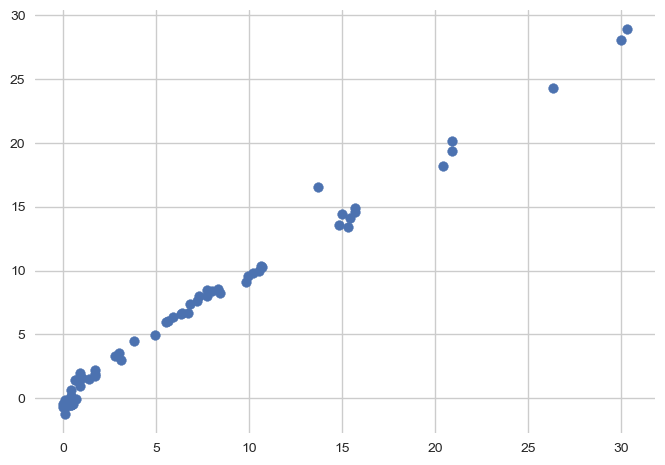

In [116]:
y_pred = lassocv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)

# Ridge Regression Model

Mean Absolute Error: 0.6875031057044091
R^2 Score: 0.9862551093277967


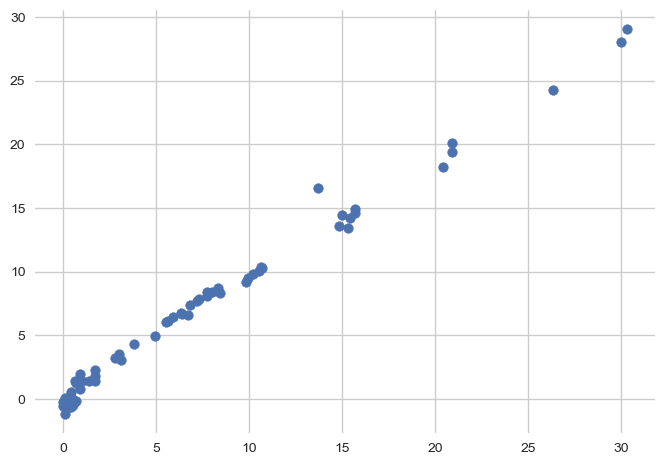

In [106]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

ridge = Ridge()
ridge.fit(x_train_scaled, y_train)
y_pred =ridge.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)
plt.scatter(y_test, y_pred)

## Cross Validation in Ridge Regression

Mean Absolute Error: 0.6875031057044091
R^2 Score: 0.9862551093277967


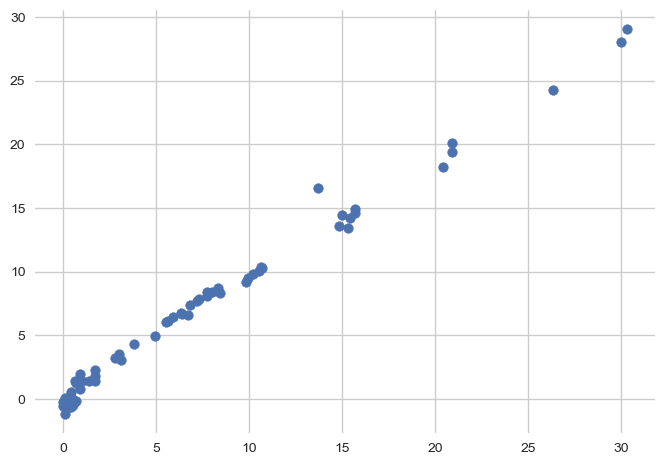

In [118]:
from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train_scaled, y_train)
y_pred = ridgecv.predict(x_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)

In [119]:
ridgecv.alpha_

1.0

In [122]:
ridgecv.alphas

(0.1, 1.0, 10.0)

In [124]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

# Elasticnet Regression Model

Mean Absolute Error: 1.9219806119808018
R^2 Score: 0.8723671804246959


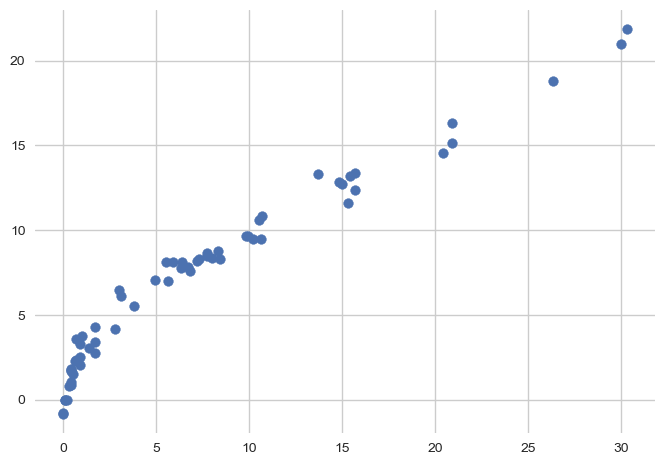

In [108]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score

elasticnet = ElasticNet()
elasticnet.fit(x_train_scaled, y_train)
y_pred =elasticnet.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)
plt.scatter(y_test, y_pred)

## Cross validation for lassonet

Mean Absolute Error: 1.9219806119808018
R^2 Score: 0.8723671804246959


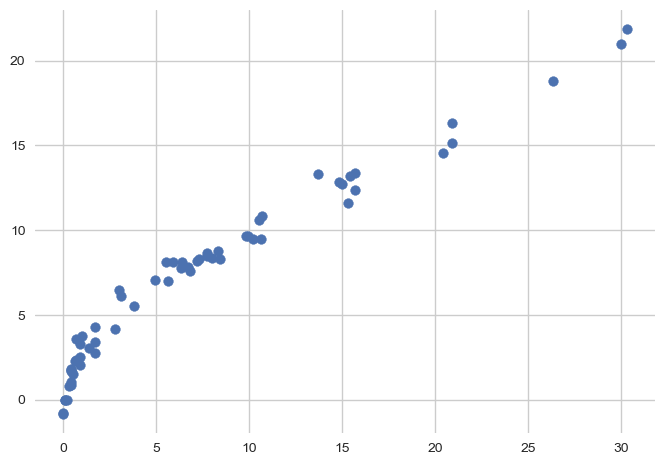

In [125]:
from sklearn.linear_model import ElasticNetCV
elasticcv = ElasticNetCV()
from sklearn.metrics import mean_absolute_error, r2_score

elasticcv.fit(x_train_scaled, y_train)
y_pred =elasticnet.predict(x_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
scored = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', scored)
plt.scatter(y_test, y_pred)

In [129]:
elasticcv.alpha_

0.022961545030125704